In [1]:
%matplotlib inline
import numpy as np
import pylab
import comp116

check, report = comp116.start('FEPreview')

with np.load('weather.npz') as data:
    temp = data['temp']
    temp.flags.writeable = False
    dewp = data['dewp']
    dewp.flags.writeable = False
    prcp = data['prcp']
    prcp.flags.writeable = False
    coords = data['coords']
    coords.flags.writeable = False

In [2]:
# Distance

distances = np.zeros((5,5))

for i in range(len(coords)):
    for j in range(len(coords)):
        distance = np.sqrt(np.sum((coords[i]-coords[j])**2))
        distances[i,j] = distance
        #distances[j,i] = distance
        
print(distances)

argmax = (np.argmax(distances))

print(np.max(distances))

print( argmax//5, ",", argmax%5)


argmax//5 + (argmax%5)/5 == argmax/5

[[ 0.          2.27384973  1.8488515   3.80441868  1.17918567]
 [ 2.27384973  0.          3.20159452  1.61331592  1.33671122]
 [ 1.8488515   3.20159452  0.          4.79712935  2.74273524]
 [ 3.80441868  1.61331592  4.79712935  0.          2.70011274]
 [ 1.17918567  1.33671122  2.74273524  2.70011274  0.        ]]
4.79712934993
2 , 3


True

In [3]:
np.max(temp, axis=2).shape # (5, 365)
temp.shape

(5, 365, 24)

In [4]:
# distance between hottest station and coldest (mean daily temp)

meanTemp = np.mean(temp, axis=2)

stationMin = np.min(meanTemp, axis=1)
minStationIndex = np.argmin(stationMin)

stationMax = np.max(meanTemp, axis=1)
maxStationIndex = np.argmax(stationMax)

print(maxStationIndex, minStationIndex)

print("Distance:", np.sqrt(np.sum((coords[maxStationIndex]-coords[minStationIndex])**2)))

2 3
Distance: 4.79712934993


In [5]:
len(temp)
temp.shape[0]

5

In [6]:
evenDays = temp[:,::2,:]
oddDays = temp[:,1::2,:]

dailyEvenMean = np.mean(evenDays, axis=2)
stationMean = np.mean(dailyEvenMean, axis=1)
evenMean = np.mean(stationMean)

print(evenMean, np.mean(evenDays))

oddMean = np.mean(oddDays)

print("Difference:", abs(oddMean - evenMean))

61.1633072529 61.1633072529
Difference: 0.0907345386853


In [7]:
temp[np.mean(temp, axis=2) > 55]

array([[ 49.,  49.,  50., ...,  64.,  60.,  56.],
       [ 44.,  46.,  45., ...,  52.,  50.,  53.],
       [ 38.,  39.,  39., ...,  66.,  66.,  66.],
       ..., 
       [ 67.,  66.,  65., ...,  47.,  47.,  46.],
       [ 51.,  57.,  56., ...,  56.,  58.,  60.],
       [ 62.,  63.,  63., ...,  52.,  50.,  49.]])

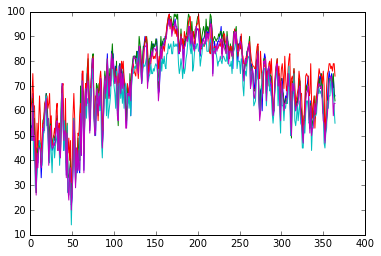

In [8]:
# Plot the daily max temp for each station

dailyMax = np.max(temp, axis=2)

for station in dailyMax:
    pylab.plot(station)

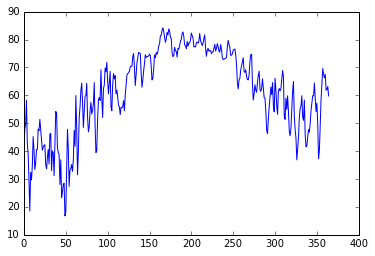

In [9]:
# Plot the daily mean across stations

dailyMean = np.mean(np.mean(temp, axis=2), axis=0)

pylab.plot(dailyMean)

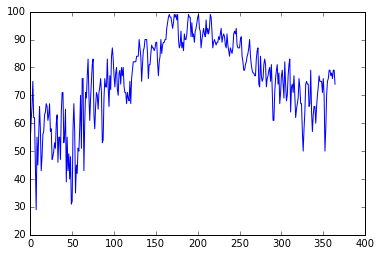

In [10]:
# Plot the single max for each day

dailyMax = np.max(np.max(temp, axis=2), axis=0)

pylab.plot(dailyMax)

In [11]:
# Function for station with lowest mean temp

def F1(temp, coords):
    
    stationMean = np.mean(np.mean(temp, axis=2), axis=1)
    
    return coords[np.argmin(stationMean)]

F1(temp, coords)

array([ 35.4185, -82.5567])

In [12]:
# Max change in daily mean for each station

dailyMean = np.mean(temp, axis=2)

diff= np.diff(dailyMean, axis=1)

maxChange = np.max(diff, axis=1)

print(maxChange)

[ 18.5         16.33333333  20.58333333  19.16666667  19.16666667]


In [13]:
# average temp of each station of days without rain
no_rain = np.zeros(len(temp))

for s in range(len(temp)):
    no_rain_temp = []
    for d in range(len(temp[s])):
        if np.all(prcp[s,d,:]==0):
            no_rain_temp.append(np.mean(temp[s,d,:]))
    no_rain[s] = np.mean(no_rain_temp)
no_rain

array([ 61.4329096 ,  62.91735537,  64.29237159,  54.34884155,  60.28958333])

In [14]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
a>5

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

In [16]:
np.all(a>5)

False

In [17]:
# Given a start hour and end hour, find the longest run of days with mean total
# precipitation across stations between those hours >= minPrecip

def F3(start, end, minPrecip):

    totalInHours = np.sum(prcp[:,:,start:end], axis=2)
    dailyMean = np.mean(totalInHours, axis=0)

    #print(dailyMean)

    run = 0
    maxrun = 0
    for i in range(len(dailyMean)):
        if dailyMean[i] >= minPrecip:
            run += 1
            if run > maxrun:
                maxrun = run
        else:
            run = 0

    return maxrun

F3(6,18,.03)

7

In [18]:
# given a start and end day/hour, find the mean for each station in that range

def F2(temp, startDay, startHour, endDay, endHour):
    means = np.zeros(5)
    startIndex = startDay * 24 + startHour
    endIndex = endDay * 24 + endHour
    for i in range(temp.shape[0]):
        means[i] = np.mean(temp[i].flatten()[startIndex:endIndex+1])
    return means

def F2_2(temp, startDay, startHour, endDay, endHour):
    sums = np.zeros(5)
    counts = np.zeros(5)
    for s in range(temp.shape[0]):
        for d in range(temp.shape[1]):
            for h in range(temp.shape[2]):
                if (d==startDay and h>=startHour) or (startDay<d<endDay) or (d==endDay and h<=endHour):
                    sums[s] += temp[s,d,h]
                    counts[s] += 1
    return sums/counts

print(F2(temp, 5, 6, 26, 18))
print(F2_2(temp, 5, 6, 26, 18))

[ 38.66731141  40.0270793   45.0270793   34.86266925  37.50676983]
[ 38.66731141  40.0270793   45.0270793   34.86266925  37.50676983]


In [19]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

a.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
print(True and False)
print(True or False)

a = np.array([True, True, False, False])
b = np.array([True, False, True, False])

print(a & b) # element 
print(a | b)

c = set([1,2,3,4])
d = set([3,4,5,6])

print(c & d) # intersection
print(c | d) # union

False
True
[ True False False False]
[ True  True  True False]
{3, 4}
{1, 2, 3, 4, 5, 6}


In [21]:
temp[0, 29, 3] # temperature at station #1 on day #30 at 3 AM

38.0

In [22]:
# How many days had rain at each station

rainyDays = np.zeros(prcp.shape[0])

# 5x365 boolean array, e.g. daysWithRain[2,4] is true if station #3 had rain during any hour on day #5
daysWithRain = np.any(prcp>0, axis=2) 

np.sum(daysWithRain, axis=1)

array([129, 123, 142, 142, 125])

In [23]:
# separate by month, might not be accurate b/c data isn't guaranteed to start on Jan 1.

months = [] # list of arrays, 5xNx24, where N is number of days in that month
monthLengths = [31,28,31,30,31,30,31,31,30,31,30,31]

for m in range(12):
    daysSoFar = sum(monthLengths[:m])
    endOfMonth = daysSoFar + monthLengths[m]
    months.append(temp[:,daysSoFar:endOfMonth,:])
    
for m in months:
    print(m.shape)

(5, 31, 24)
(5, 28, 24)
(5, 31, 24)
(5, 30, 24)
(5, 31, 24)
(5, 30, 24)
(5, 31, 24)
(5, 31, 24)
(5, 30, 24)
(5, 31, 24)
(5, 30, 24)
(5, 31, 24)


In [24]:
# Longest run of rainy hours at each station

maxruns = np.zeros(prcp.shape[0]) # can use list or array
for s in range(prcp.shape[0]):
    run = 0
    for d in range(prcp.shape[1]):
        for h in range(prcp.shape[2]):
            if prcp[s,d,h] > 0:
                run += 1
                if run > maxruns[s]:
                    maxruns[s] = run # if you use an array, you assign maxrun to the appropriate position
            else:
                run = 0
                
maxruns

array([ 21.,  23.,  21.,  27.,  24.])

In [25]:
#Longest run of rainy days at each station

maxruns = [] # can use list or array
for s in range(prcp.shape[0]):
    maxrun = 0
    run = 0
    for d in range(prcp.shape[1]):
        if np.any(prcp[s,d,:]):
            run += 1
            if run > maxrun:
                maxrun = run
        else:
            run = 0
    maxruns.append(maxrun) # if you use a list, you have to append the value
    
                
maxruns

[12, 10, 7, 11, 11]

In [26]:
distances = np.zeros((prcp.shape[0],prcp.shape[0]))

for i in range(len(coords)):
    for j in range(len(coords)):
        distance = np.sqrt(np.sum((coords[i]-coords[j])**2))
        distances[i,j] = distance

print(distances)        

totalDistance = 0
for i in range(prcp.shape[0]):
    for j in range(prcp.shape[0]):
        if i != j: #dont count distance between a station and itself
            # we can count each distance twice b/c we divide by 20 even though there are only 10 unique distances
            totalDistance += distances[i,j]

# (-prcp.shape[0]) dont count distance between a station and itself
print("Mean Distance:", totalDistance/(distances.size-prcp.shape[0])) 

[[ 0.          2.27384973  1.8488515   3.80441868  1.17918567]
 [ 2.27384973  0.          3.20159452  1.61331592  1.33671122]
 [ 1.8488515   3.20159452  0.          4.79712935  2.74273524]
 [ 3.80441868  1.61331592  4.79712935  0.          2.70011274]
 [ 1.17918567  1.33671122  2.74273524  2.70011274  0.        ]]
Mean Distance: 2.54979045737


In [27]:
np.zeros((5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [28]:
a = 0
a += 2  # a = a + 2
a /= 2  # a = a / 2

In [29]:
if "abc" in "jhjkhweabcriouygi":
    print("in")
else:
    print("not in")
    
if "abc" not in ["adh", "abcd", "lkjlkjd"]:
    print("not in")
else:
    print("in")

in
not in


In [30]:
meanTemp = np.mean(temp, axis=2)

stationMin = np.min(meanTemp, axis=1)
minStationIndex = np.argmin(stationMin)

coords[minStationIndex]

array([ 35.4185, -82.5567])